## Load in the data

In [11]:
import pandas as pd
import os

In [12]:
files = [file for file in os.listdir('Sales_Data')]
for file in files:
    print(file)

sales_all_months.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


## concatenate all the files

In [13]:
data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    data = pd.concat([data, df])
    
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Output combined data to a csv file

In [14]:
data.to_csv('sales_all_months.csv', index=False)

## Read-in the combined datasets as a new single dataset

In [15]:
sales_data = pd.read_csv('sales_all_months.csv')
print(sales_data.shape)
sales_data.head()

(373700, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean Data

In [16]:
# Drop null values
print(sales_data.shape)
sales_data.dropna(inplace=True,how='all')
print(sales_data.shape)

(373700, 6)
(372610, 6)


In [17]:
#clean the Order Date column
sales_data = sales_data[sales_data['Order Date'].str[:2] != 'Or']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [18]:
#Correct columns datatype
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

## 1: Best month for sales and how much was earned in the month


In [19]:
# Add separate month column
dates = sales_data['Order Date']
months = []
for date in dates:
    month = date[:2]
    months.append(month)
sales_data['month']= months
sales_data['month'] = pd.to_numeric(sales_data['month'])
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [20]:
# Add a column to recorde total sale amount for each product
sales_data['total sale'] = sales_data['Quantity Ordered']*sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [21]:
sales_per_month = sales_data.groupby('month').sum()
sales_per_month

,Quantity Ordered,Price Each,total sale
month,,,
1,21806,3.623537e+06,3.644513e+06
2,26898,4.377769e+06,4.404045e+06
3,34010,5.582416e+06,5.614201e+06
4,41116,6.735342e+06,6.781340e+06
5,37334,6.270250e+06,6.305214e+06
6,30506,5.124051e+06,5.155605e+06
7,32144,5.265079e+06,5.295552e+06
8,26896,4.460691e+06,4.488936e+06
9,26218,4.169984e+06,4.195120e+06


December was the best month for sales with a total of 4,608,296

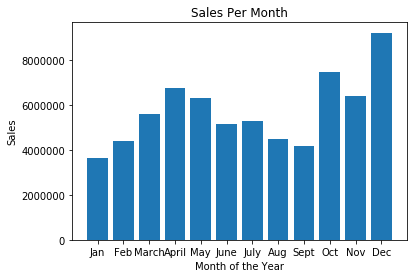

In [22]:
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept','Oct', 'Nov', 'Dec']
plt.bar(months, sales_per_month['total sale'])
plt.title('Sales Per Month')
plt.ylabel('Sales')
plt.xlabel('Month of the Year')
plt.show()

## 2. City with the highest number of sales

In [23]:
#Add a city column
def get_city(purchase_address):
    return purchase_address.split(',')[1]
def get_state(purchase_address):
    return purchase_address.split(',')[2].split(' ')[1]
sales_data['city'] = sales_data['Purchase Address'].apply(lambda x:get_city(x) + ' ' + get_state(x))
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total sale,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [24]:
sales_per_city = sales_data.groupby('city').sum()
sales_per_city 

,Quantity Ordered,Price Each,month,total sale
city,,,,
Atlanta GA,33204,5.559816e+06,209588,5.590997e+06
Austin TX,22306,3.619747e+06,139658,3.639164e+06
Boston MA,45056,7.274820e+06,282224,7.323284e+06
Dallas TX,33460,5.505256e+06,209240,5.535951e+06
Los Angeles CA,66578,1.084287e+07,416650,1.090514e+07
New York City NY,55864,9.270742e+06,351482,9.328635e+06
Portland ME,5500,8.943785e+05,34288,8.995165e+05
Portland OR,22606,3.721116e+06,141242,3.741465e+06
San Francisco CA,100478,1.642292e+07,631040,1.652441e+07


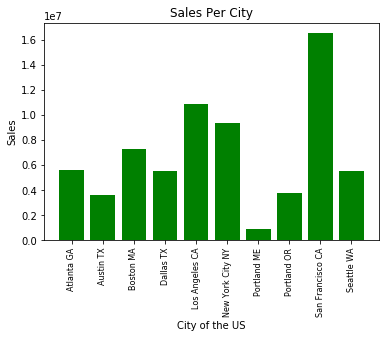

In [25]:
cities = ['Atlanta GA', 'Austin TX', 'Boston MA', 'Dallas TX', 'Los Angeles CA', 'New York City NY', 'Portland ME', 'Portland OR', 'San Francisco CA','Seattle WA']
plt.bar(cities, sales_per_city ['total sale'], color='green')
plt.title('Sales Per City')
plt.ylabel('Sales')
plt.xlabel('City of the US')
plt.xticks(cities,rotation='vertical', size=8)
plt.show()

San Francisco is the best performing city

## 3. Best Suited time to for ads to maximize sales

In [26]:
# covert order date into a date time object
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total sale,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [27]:
#Add an hour column
sales_data['hour'] = sales_data['Order Date'].dt.hour
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total sale,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20
373696,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16
373697,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17


In [28]:
orders_by_hour = sales_data.groupby('hour').count()
orders_by_hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total sale,city
hour,,,,,,,,,
0,7820,7820,7820,7820,7820,7820,7820,7820,7820
1,4700,4700,4700,4700,4700,4700,4700,4700,4700
2,2486,2486,2486,2486,2486,2486,2486,2486,2486
3,1662,1662,1662,1662,1662,1662,1662,1662,1662
4,1708,1708,1708,1708,1708,1708,1708,1708,1708
5,2642,2642,2642,2642,2642,2642,2642,2642,2642
6,4964,4964,4964,4964,4964,4964,4964,4964,4964
7,8022,8022,8022,8022,8022,8022,8022,8022,8022
8,12512,12512,12512,12512,12512,12512,12512,12512,12512


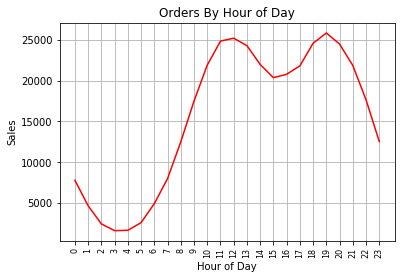

In [29]:
hours = range(0,24)
plt.plot(hours, orders_by_hour['total sale'], color='red')
plt.title('Orders By Hour of Day')
plt.ylabel('Sales')
plt.xlabel('Hour of Day')
plt.xticks(hours,rotation='vertical', size=8)
plt.grid(True)
plt.show()

Between 1100-1200hr  and 1800-1900hrs appears to be when most orders are made hence would probably be a good time to display adevertisemnts

## 4. Products mostly sold together

In [30]:
print(sales_data['Order ID'].value_counts())

160873    10
304802     8
178158     8
312462     8
312407     8
          ..
147138     2
249230     2
201680     2
288741     2
147853     2
Name: Order ID, Length: 178437, dtype: int64


In [31]:
sales_data = sales_data.reset_index(drop=True)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total sale,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [32]:
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]
df['bought_together'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','bought_together']].drop_duplicates()

df.head()


,Order ID,bought_together
0,176558,"USB-C Charging Cable,USB-C Charging Cable"
1,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176561,"Wired Headphones,Wired Headphones"
5,176562,"USB-C Charging Cable,USB-C Charging Cable"


In [33]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['bought_together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print(key,value)


('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


iPhone' and 'Lightning Charging Cable are the items most commonly bought together

## 5. What Product made most sales

In [34]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total sale,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [35]:
sales_per_product = sales_data.groupby('Product')
quantity_ordered = sales_per_product.sum()['Quantity Ordered']

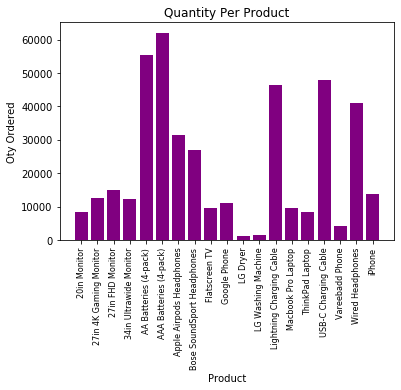

In [36]:
products = [product for product, df in sales_per_product]
plt.bar(products, quantity_ordered, color='purple')
plt.title('Quantity Per Product')
plt.ylabel('Oty Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical', size=8)
plt.show()

AAA Batteries was the most sold item

In [37]:
prices = sales_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

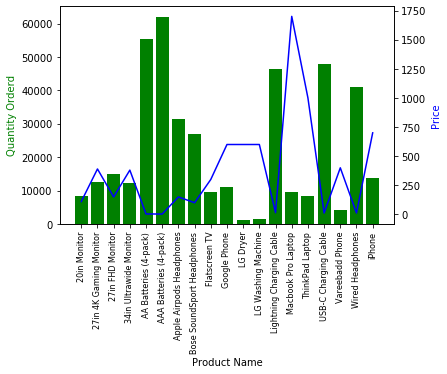

In [38]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products,rotation='vertical',size=8)
ax1.set_ylabel('Quantity Orderd',color='g')
ax2.set_ylabel('Price', color='b')

plt.show()
